In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: Show plots inline
%matplotlib inline

# Optional: Set a nice style for plots
sns.set(style="whitegrid")

print("Libraries imported successfully!")

Libraries imported successfully!


In [2]:
# Load the dataset from URL
url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"
df = pd.read_csv(url)

# Show top 5 rows
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN


In [3]:
# Check the shape of the dataset (rows, columns)
print("Shape of dataset:", df.shape)

# Show all column names
print("\nColumn Names:\n", df.columns.tolist())

# Check for missing values
print("\nMissing values per column:\n")
print(df.isnull().sum())

Shape of dataset: (429435, 67)

Column Names:
 ['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients', 'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'new_vaccinations', 'new_vaccinations_smoothed', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',

In [4]:
# Choose useful, mostly complete columns
selected_columns = ['location', 'date', 'total_cases', 'new_cases', 'total_deaths', 'new_deaths',
                    'total_vaccinations', 'people_vaccinated', 'population']

# Create a new DataFrame
covid_df = df[selected_columns]

# Convert date column to datetime format
covid_df['date'] = pd.to_datetime(covid_df['date'])

# Filter to a few countries to start with (e.g. Pakistan, India, US)
countries = ['Pakistan', 'India', 'United States']
covid_df = covid_df[covid_df['location'].isin(countries)]

# Check the result
covid_df.head()


/tmp/ipython-input-4-2969523547.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_df['date'] = pd.to_datetime(covid_df['date'])


,location,date,total_cases,new_cases,total_deaths,new_deaths,total_vaccinations,people_vaccinated,population
173549,India,2020-01-05,0.0,0.0,0.0,0.0,NaN,NaN,1417173120
173550,India,2020-01-06,0.0,0.0,0.0,0.0,NaN,NaN,1417173120
173551,India,2020-01-07,0.0,0.0,0.0,0.0,NaN,NaN,1417173120
173552,India,2020-01-08,0.0,0.0,0.0,0.0,NaN,NaN,1417173120
173553,India,2020-01-09,0.0,0.0,0.0,0.0,NaN,NaN,1417173120


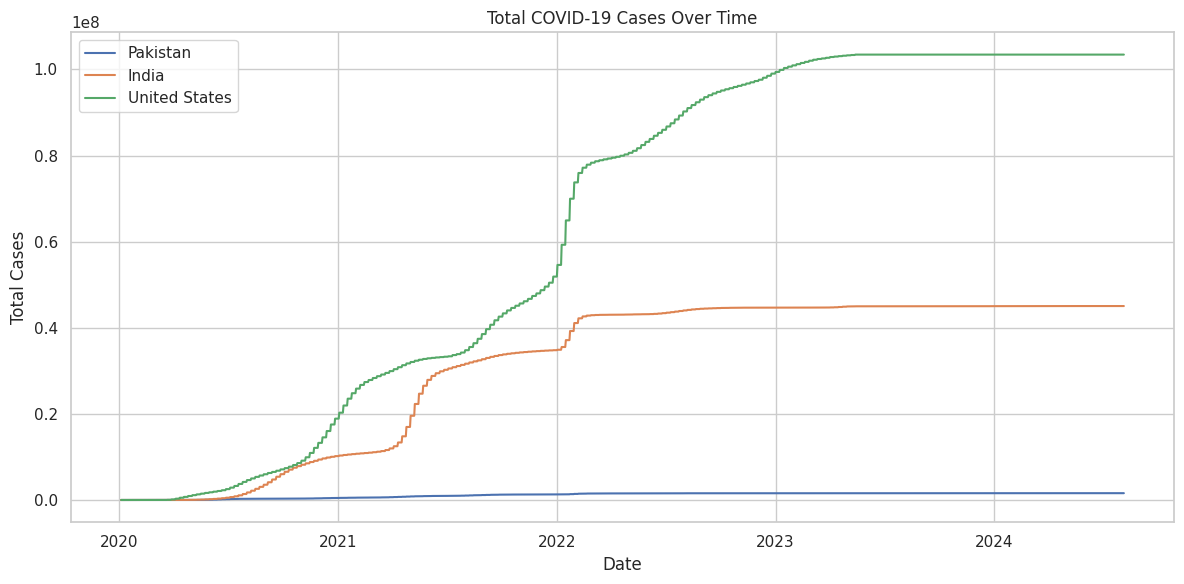

In [5]:
# Plot total COVID cases over time for selected countries

plt.figure(figsize=(12,6))

for country in countries:
    country_data = covid_df[covid_df['location'] == country]
    plt.plot(country_data['date'], country_data['total_cases'], label=country)

plt.title('Total COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend()
plt.tight_layout()
plt.show()

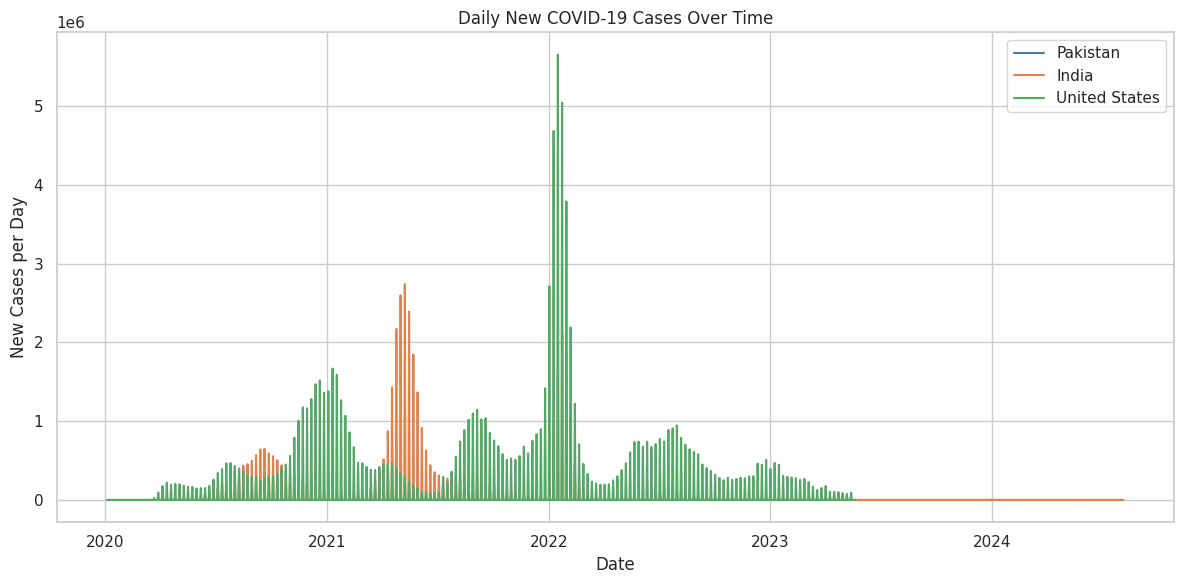

In [6]:
# Plot daily new COVID cases over time for selected countries

plt.figure(figsize=(12,6))

for country in countries:
    country_data = covid_df[covid_df['location'] == country]
    plt.plot(country_data['date'], country_data['new_cases'], label=country)

plt.title('Daily New COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('New Cases per Day')
plt.legend()
plt.tight_layout()
plt.show()


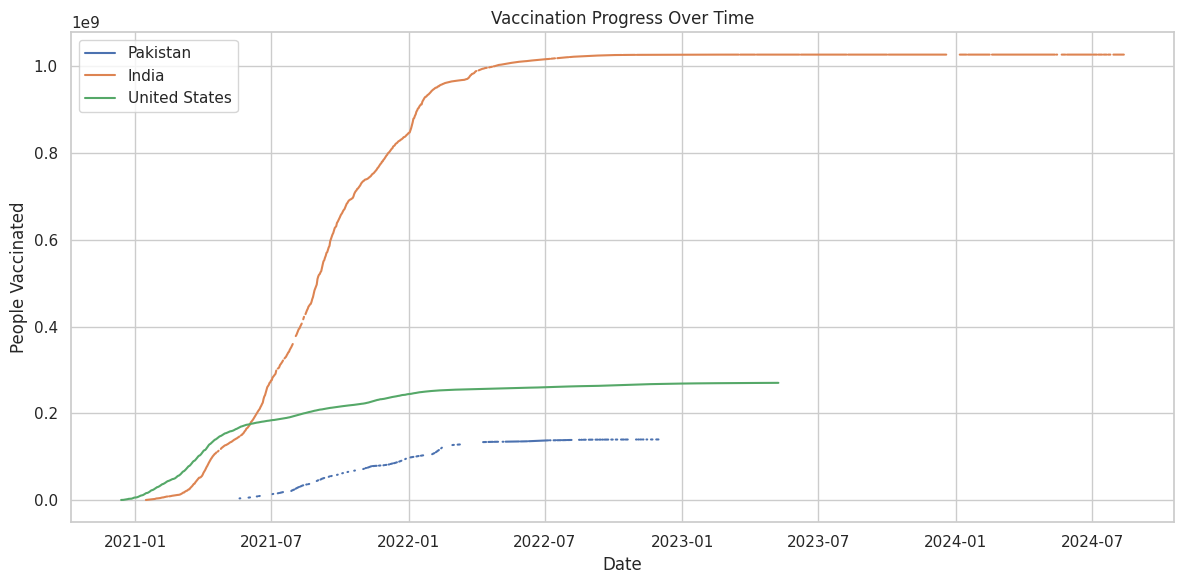

In [7]:
plt.figure(figsize=(12,6))

for country in countries:
    country_data = covid_df[covid_df['location'] == country]
    plt.plot(country_data['date'], country_data['people_vaccinated'], label=country)

plt.title('Vaccination Progress Over Time')
plt.xlabel('Date')
plt.ylabel('People Vaccinated')
plt.legend()
plt.tight_layout()
plt.show()


# 📊 COVID-19 Data Analysis — Pakistan, India, and USA

This notebook analyzes the COVID-19 pandemic trends from January 2020 onwards across three countries: **Pakistan**, **India**, and the **United States**.

It includes:
- 📈 Total confirmed cases
- 📉 Daily new cases
- 💉 Vaccination progress

Data Source: [Our World in Data](https://ourworldindata.org/coronavirus-source-data)
## 🦠 Total COVID-19 Cases Over Time
This line plot shows the growth of total reported cases in each country over time.
## 📊 Daily New COVID-19 Cases
This plot shows daily new infections and helps identify peaks/waves.
## 💉 Vaccination Progress
This plot shows how many people were vaccinated in each country over time.
## ✅ Conclusion

- The United States had earlier access to vaccines and a higher vaccination rate.
- India showed strong waves during mid-2021.
- Pakistan’s data had fewer early cases but slower vaccination progress.

This basic analysis shows how Python can be used for real-world scientific research.
